In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [57]:
df = pd.read_csv("C:\\Users\\Harsh\\Desktop\\fifa\\FullData.csv")#file location
df.head(7)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10


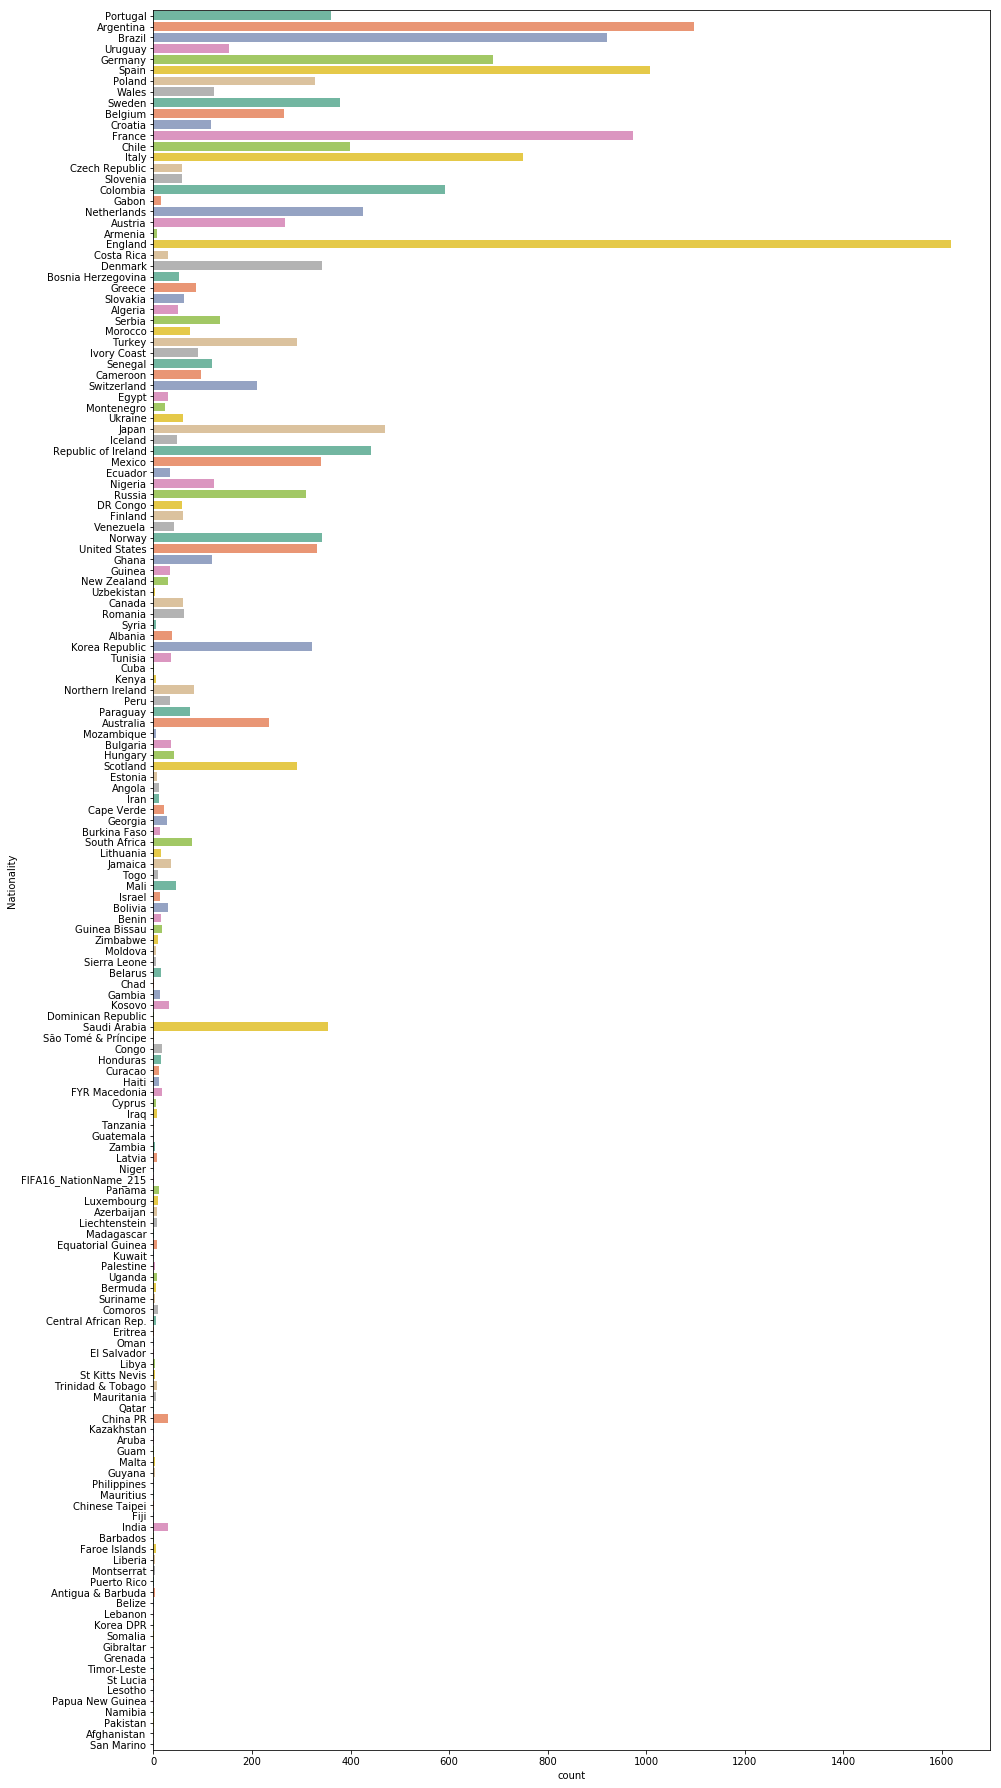

In [58]:
plt.figure(figsize=(15,32))
 
sns.countplot(y = df.Nationality,palette="Set2")

In [59]:
#finding best golkeeper

a = 1
b = 2
c= 3
d = 4
 
df['gk_defender'] = (b*df.Reactions +b*df.Vision+ b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 5*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)


Text(0, 0.5, 'Shot Stopping Score')

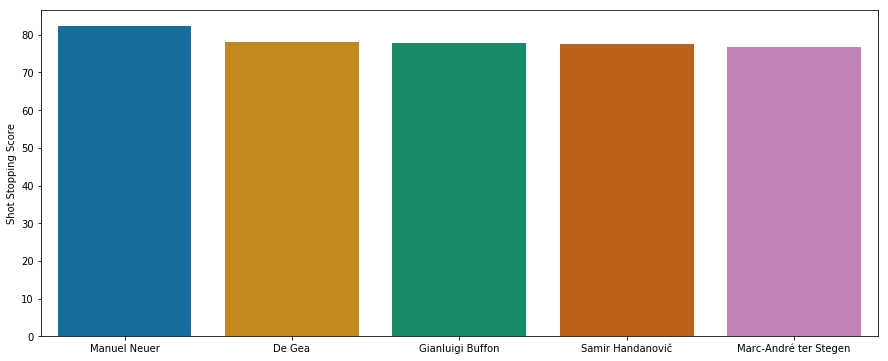

In [60]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('gk_defender', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_defender']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")
#Manuel Neuer is best defender

Text(0, 0.5, 'Sweeping Score')

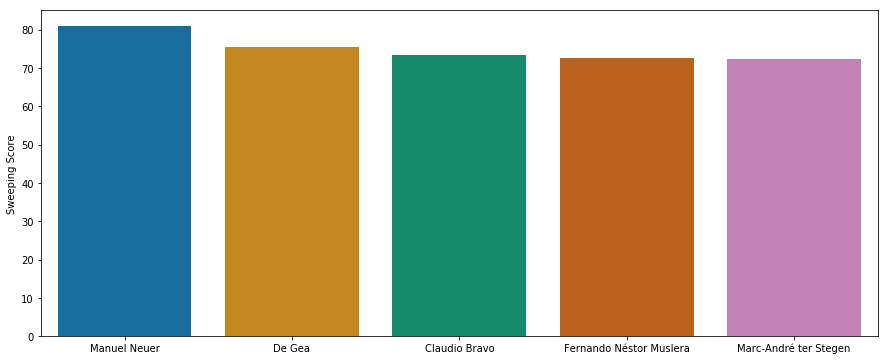

In [14]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")
#Manuel Neuer is best sweeper too.

In [26]:
#finding center backs and wing backs defender

df['df_centre_backs'] = ( d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.Short_Pass + b*df.Long_Pass+ c*df.Acceleration + b*df.Speed+ d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)
df['df_wb_Wing_Backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)


Text(0, 0.5, 'LCB Score')

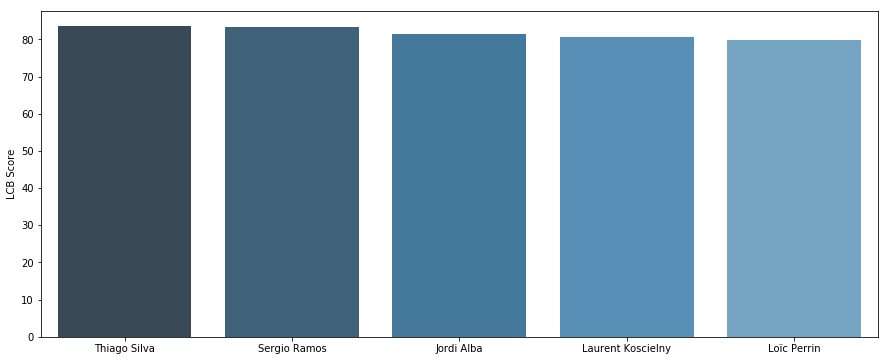

In [27]:
#left central defender
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

#Best LCB Thiago Silva 

Text(0, 0.5, 'RCB Score')

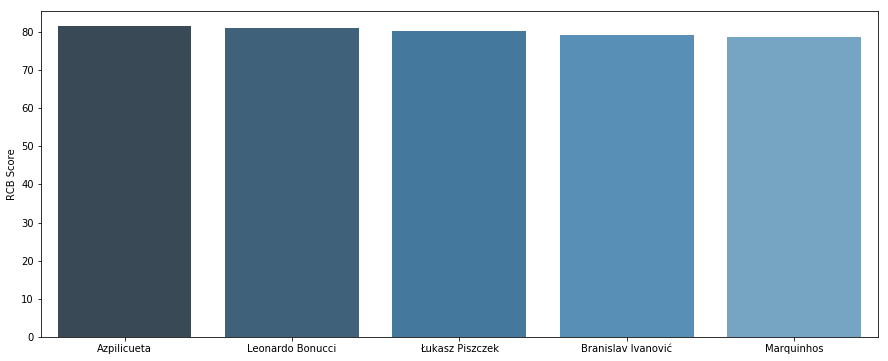

In [18]:
#right central defender
plt.figure(figsize=(15,6))
 
sd = df[(df['Club_Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")
#Best RCB Axpillicueta

Text(0, 0.5, 'Left Back Score')

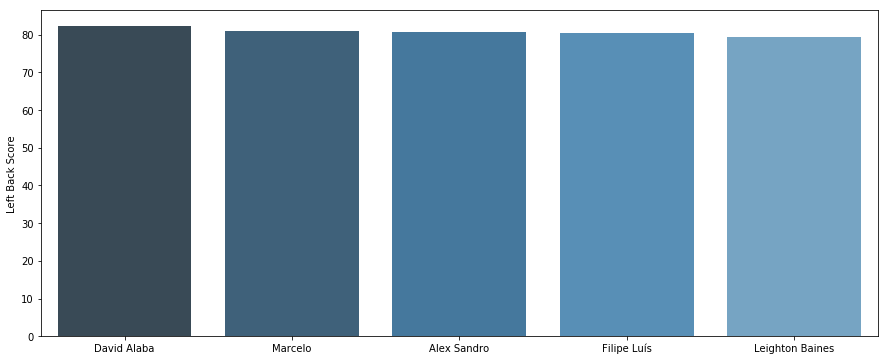

In [20]:
#Left Wing back
plt.figure(figsize=(15,6))
 
sd = df[(df['Club_Position'] == 'LWB') | (df['Club_Position'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")
#Since David Alaba’s team does not qualify in the world cup 2018, I’ll be picking Marcelo as the best LWB/LB defender.

Text(0, 0.5, 'Right Back Score')

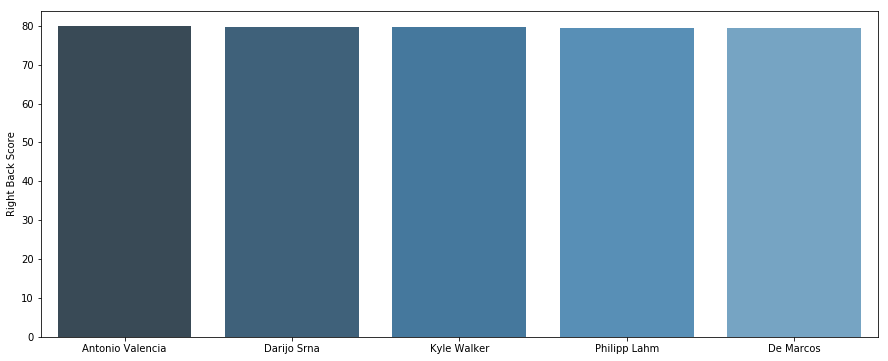

In [30]:
#Right Wing Back
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'RWB') | (df['Club_Position'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")
#Best RWB/RB Antonio Valencia

In [34]:
#Midfielding Indices
df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)


Text(0, 0.5, 'PlayMaker Score')

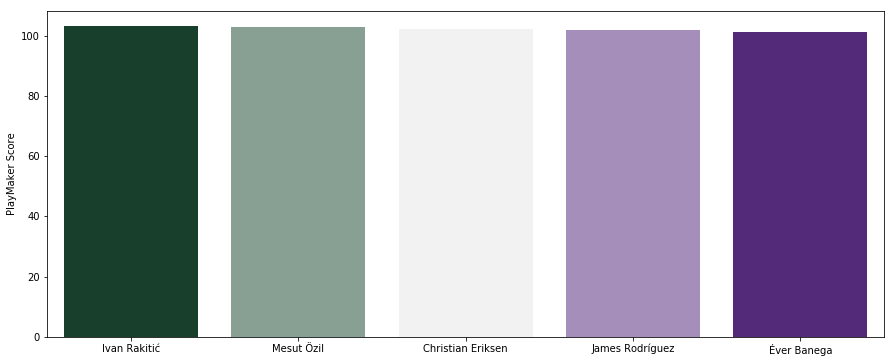

In [35]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'CAM') | (df['Club_Position'] == 'LAM') | (df['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

#best playmaker Ivan Rakitic

Text(0, 0.5, 'Beast Score')

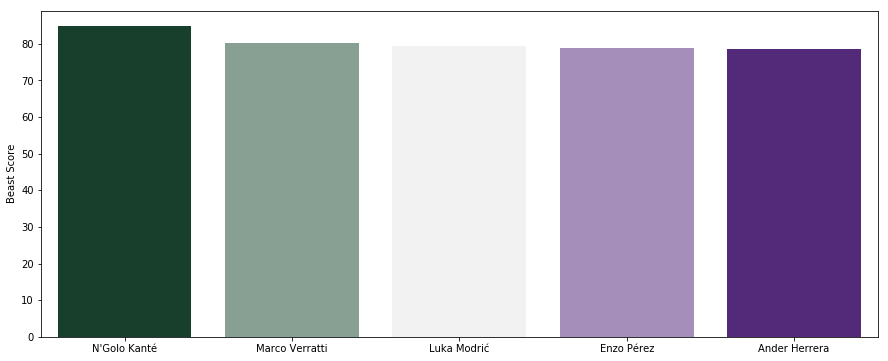

In [37]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")
#The best N’ Golo Kante

Text(0, 0.5, 'Controller Score')

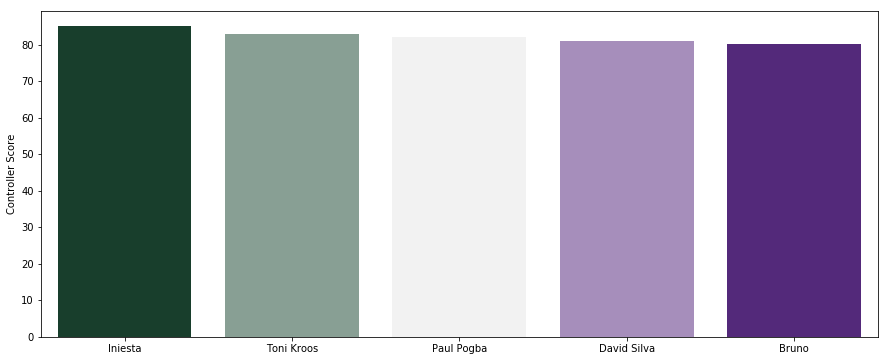

In [39]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")
#The best controller Iniesta

In [40]:
#Finding The Best Attackers

#Attackers
df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)


Text(0, 0.5, 'Left Wing')

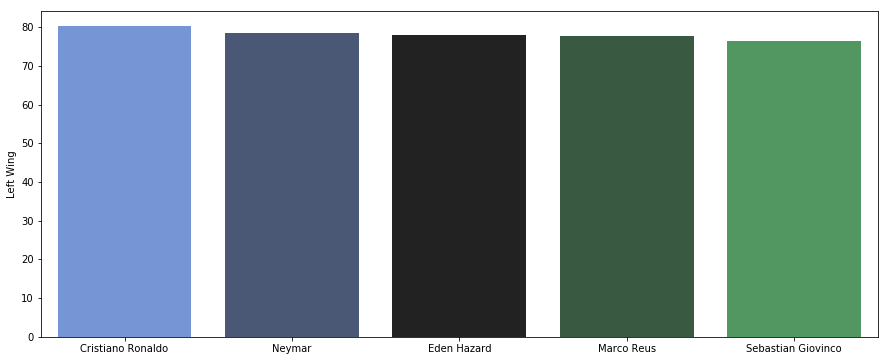

In [41]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")
#The best left wing attcker Ronaldo

Text(0, 0.5, 'Right Wing')

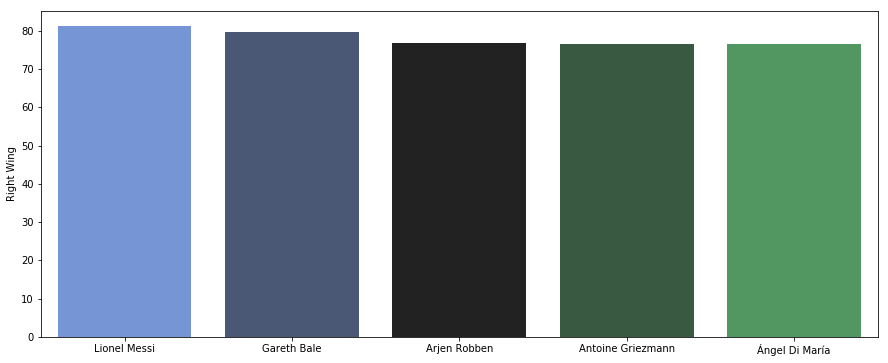

In [43]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")
#The best right wing attacker Messi

Text(0, 0.5, 'Striker')

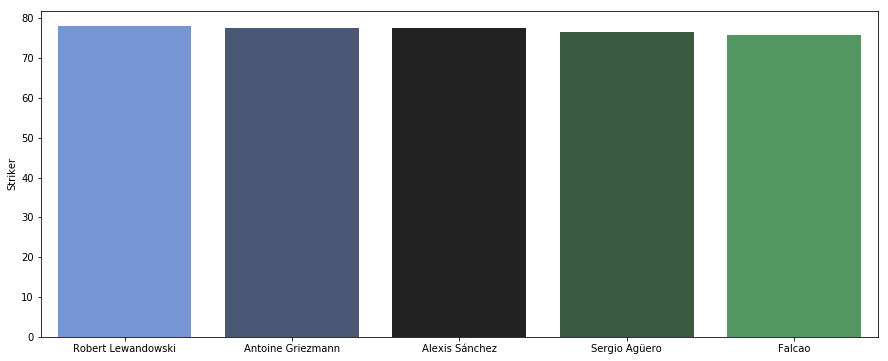

In [45]:
plt.figure(figsize=(15,6))
ss = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")
#The best striker Robert Lewandowski

In [47]:
import openpyxl

In [55]:
writer = pd.ExcelWriter('C:\\Users\\Harsh\\Desktop\\fifa\\new_fifa.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()